In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [15]:
# Set Seaborn theme
sns.set(style="whitegrid", context="talk")
font_size = 20
dpi = 300

In [13]:
df = pd.read_csv("../results/metrics.csv")

In [14]:
df

,model,technique,size_MB,params_M,latency_ms,accuracy,note
0,resnet50,baseline,95.17,23.71,164.67,55.59,CIFAR-100 head-tuned (3 epochs)
1,resnet50,prune-struct-0.1,61.10,15.21,128.68,1.36,CIFAR-100 structured L1
2,resnet50,prune-struct-0.1,61.10,15.21,129.46,6.43,CIFAR-100 structured L1 + BN recalibration
3,resnet50,prune-struct-0.3,27.71,6.89,71.93,1.21,CIFAR-100 structured L1 + BN recalibration
4,resnet50,prune-struct-0.1+ft1,61.10,15.21,130.50,60.15,CIFAR-100 structured L1
5,resnet50,prune-struct-0.3+ft1,27.71,6.89,72.78,13.80,CIFAR-100 structured L1
6,resnet50,prune-struct-0.15+ft1,49.69,12.37,114.84,44.42,CIFAR-100 structured L1
7,resnet50,prune-struct-0.125+ft1,54.88,13.66,109.93,53.35,CIFAR-100 structured L1
8,resnet50,nofuse_fp16_recoveryFT0e_compile,47.86,23.71,57.13,55.59,"AdamW_lr=0.0001, batch=256, clip=1.0"
9,resnet50,nofuse_fp16_recoveryFT1e_compile,47.86,23.71,57.02,79.32,"AdamW_lr=0.0001, batch=256, clip=1.0"


In [21]:
df_sparsity = df.iloc[[0,4,7,6,5], :]
df_sparsity['Sparsity'] = df_sparsity['technique'].apply(lambda t: t.split('-')[2].split('+')[0] if '-' in t else 0)
df_sparsity

C:\Users\En_ki\AppData\Local\Temp\ipykernel_34604\791869579.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sparsity['Sparsity'] = df_sparsity['technique'].apply(lambda t: t.split('-')[2].split('+')[0] if '-' in t else 0)


,model,technique,size_MB,params_M,latency_ms,accuracy,note,Sparsity
0,resnet50,baseline,95.17,23.71,164.67,55.59,CIFAR-100 head-tuned (3 epochs),0
4,resnet50,prune-struct-0.1+ft1,61.10,15.21,130.50,60.15,CIFAR-100 structured L1,0.1
7,resnet50,prune-struct-0.125+ft1,54.88,13.66,109.93,53.35,CIFAR-100 structured L1,0.125
6,resnet50,prune-struct-0.15+ft1,49.69,12.37,114.84,44.42,CIFAR-100 structured L1,0.15
5,resnet50,prune-struct-0.3+ft1,27.71,6.89,72.78,13.80,CIFAR-100 structured L1,0.3


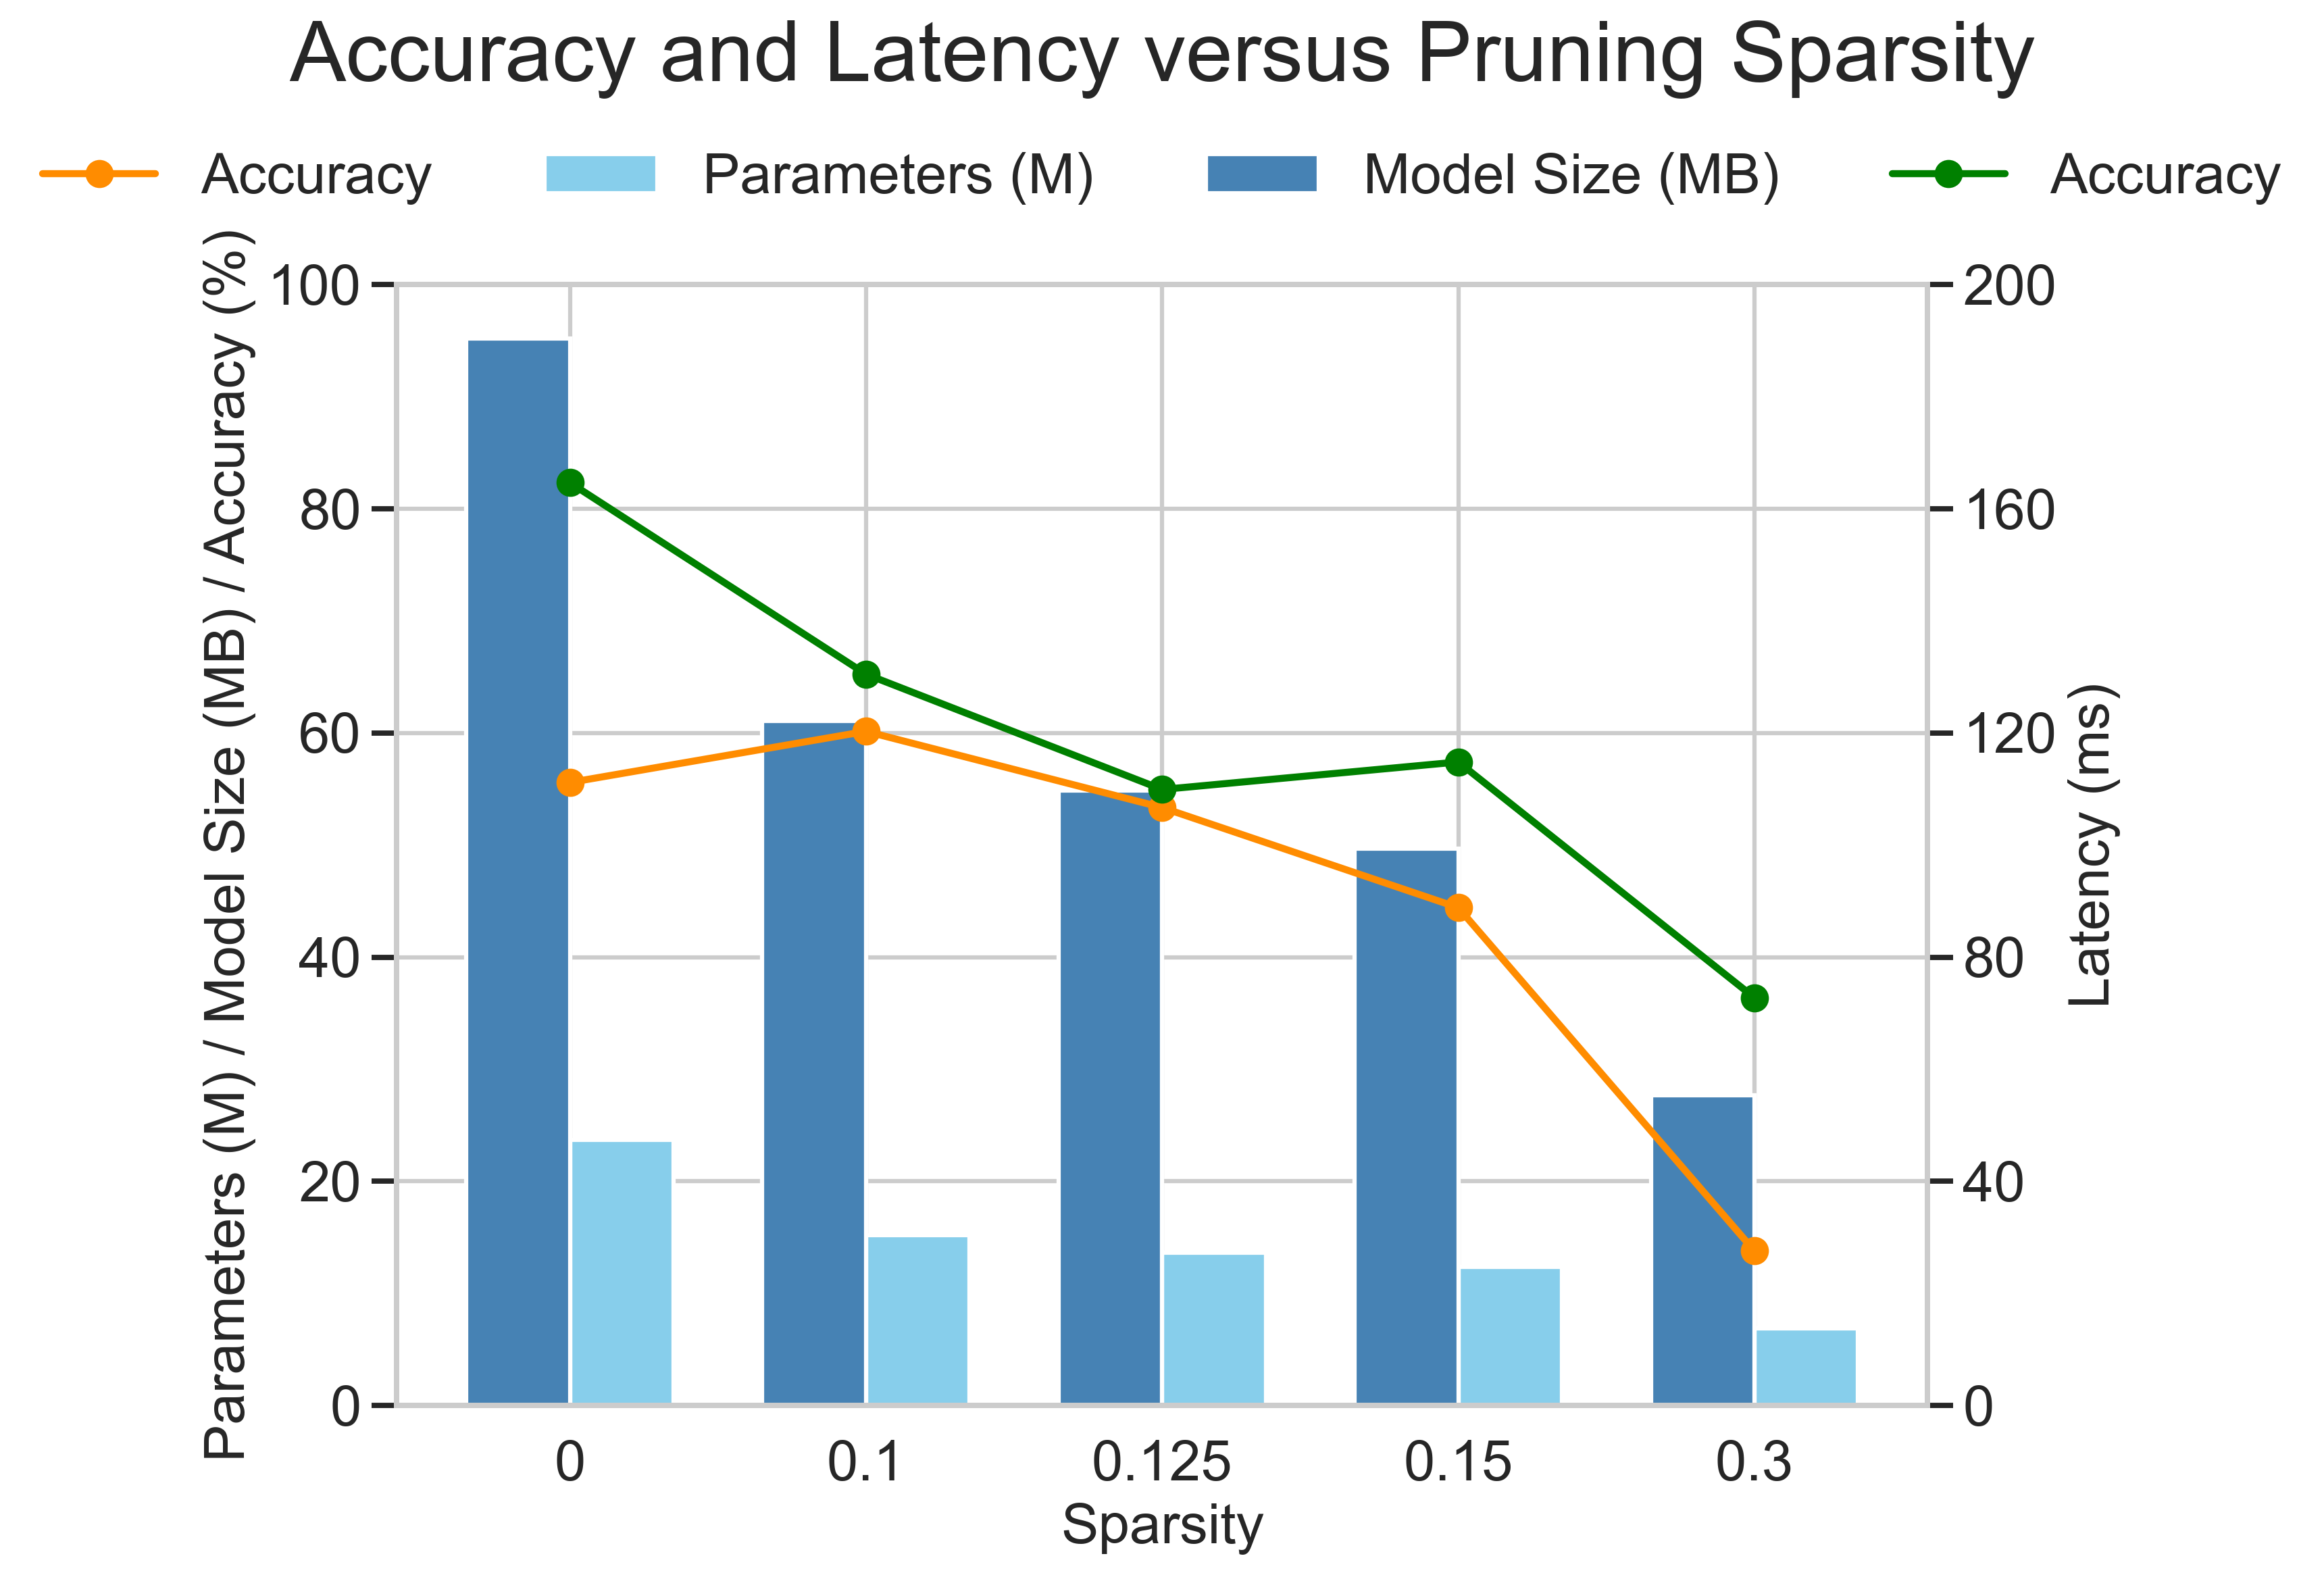

In [29]:
bar_width = 0.35
x = np.arange(len(df_sparsity))

# Plot
fig, ax1 = plt.subplots(figsize=(10, 8), dpi=dpi)

# Bar plots
ax1.bar(x + bar_width/2, df_sparsity['params_M'], width=bar_width, label='Parameters (M)', color='skyblue')
ax1.bar(x - bar_width/2, df_sparsity['size_MB'], width=bar_width, label='Model Size (MB)', color='steelblue')
ax1.plot(x, df_sparsity['accuracy'], color='darkorange', marker='o', linewidth=2.5, label='Accuracy')

# Left axis labels
ax1.set_xlabel("Sparsity", fontsize=font_size)
ax1.set_ylabel("Parameters (M) / Model Size (MB) / Accuracy (%)", fontsize=font_size)
ax1.set_xticks(x)
ax1.set_xticklabels(df_sparsity['Sparsity'], fontsize=font_size)
ax1.tick_params(axis='y', labelsize=font_size)
ax1.set_ylim(0, 100)
ax1.grid(True)

# Right axis for accuracy
ax2 = ax1.twinx()
ax2.plot(x, df_sparsity['latency_ms'], color='green', marker='o', linewidth=2.5, label='Accuracy')
ax2.set_ylabel("Latency (ms)", fontsize=font_size)
ax2.tick_params(axis='y', labelsize=font_size)
ax2.grid(False)  # Disable gridlines on right axis

# Align gridlines by forcing y-ticks to match
ax1.set_yticks(np.linspace(0, 100, 6))  # Match number of grid lines with default
ax2.set_yticks(np.linspace(0, 200, 6))

# Gather and combine handles/labels from both axes
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles = handles1 + handles2
labels = labels1 + labels2

# Add combined legend
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.93), ncol=4, fontsize=font_size, frameon=False)
# fig.legend(handles, labels, loc='center left', fontsize=font_size, bbox_to_anchor=(1.02, 0.5), frameon=False)
plt.tight_layout()

# Title and layout
fig.suptitle("Accuracy and Latency versus Pruning Sparsity\n", fontsize=font_size + 10)
plt.tight_layout()
plt.show()